In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import tensorflow as tf
from tensorflow import keras


In [2]:
def seeds(seed_no):
    np.random.seed(seed_no)
    tf.random.set_seed(seed_no)

seeds(0)

In [3]:
train = pd.read_csv("Update_train.csv")
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250


In [4]:
test = pd.read_csv("Updated_Test.csv")
test.head(3)

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,...,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity
0,ID_KWUAQLRM,ID_2982,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,...,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,0,0.0027,37.09,27.22
1,ID_FN8SIVJJ,ID_2982,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,...,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,1,0.0027,37.20,27.17
2,ID_CI4TQCHI,ID_2982,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,...,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,2,0.0027,37.30,27.07


In [5]:
train = train.rename(columns={"hdl_cholesterol_human":"hdl", "hemoglobin(hgb)_human":"hgb", "cholesterol_ldl_human":"ldl"})

# hdl_cholesterol_human - hdl
# hemoglobin(hgb)_human - hgb
# cholesterol_ldl_human - ldl

In [6]:
print(train.columns)
print("")
print("")
print(train.info())

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29160 entries, 0 to 29159
Columns: 178 entries, absorbance0 to donation_id
dtypes: float64(173), int64(2), object(3)
memory usage: 39.6+ MB
None


In [7]:
train["hdl"].value_counts()

ok      14940
low      7920
high     6300
Name: hdl, dtype: int64

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hdl', ylabel='count'>

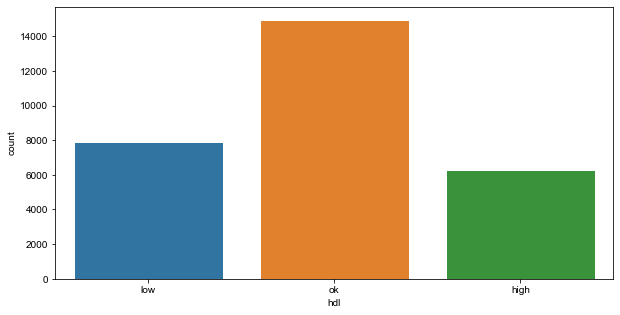

In [8]:
plt.subplots(figsize=(10, 5))

sns.set_style("whitegrid")
sns.countplot(train["hdl"])

In [9]:
train["hgb"].value_counts()

ok      24840
high     2520
low      1800
Name: hgb, dtype: int64

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hgb', ylabel='count'>

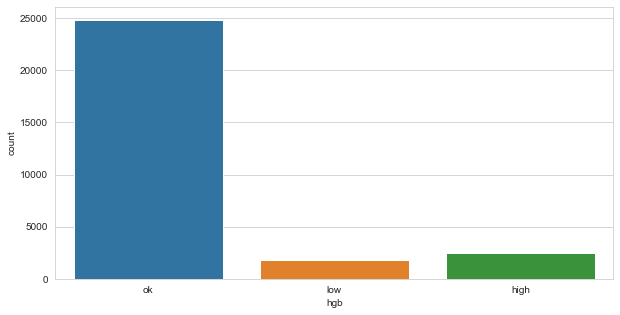

In [10]:
plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")

sns.countplot(train["hgb"])

In [11]:
train["ldl"].value_counts()

ok      15540
high    12300
low      1320
Name: ldl, dtype: int64

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ldl', ylabel='count'>

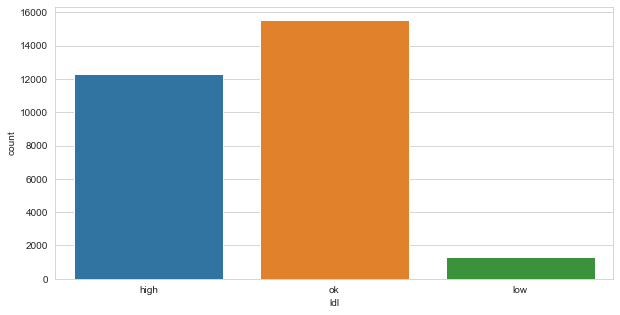

In [12]:
plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")

sns.countplot(train["ldl"])

For our target distribution, hdl seems balanced between the classes, hgb is inbalanced in two classes(ok, high), ldl is inbalanced on one class(high)

Cholesterol_hdl levels in users is balanced between low, ok, high
hemoglobin levels in users is grossly inbalanced. over 80% of users have low hamoglobin levels
patients do not have high cholesterol_ldl levels

hdl_cholesterol_human - hdl
hemoglobin(hgb)_human - hgb
cholesterol_ldl_human - ldl

In [13]:

no_patients = len( train["donation_id"].value_counts() )
no_patients
# 486 patients

486

In [14]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)

- variation between each individual persons scans(temperature, humidity)

In [15]:
train.donation_id.values

array([2250, 2250, 2250, ..., 1994, 1994, 1994], dtype=int64)

In [16]:
patients = train.groupby(["donation_id"])
id_2250 = patients.get_group(2250)

id_2250.head(5)

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl,hgb,ldl,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250


In [17]:
id_2250.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity,donation_id
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.0
mean,0.526054,0.530171,0.534219,0.539311,0.545288,0.551565,0.557454,0.564451,0.576432,0.589564,...,1.300352,1.298555,1.294824,1.295781,1.296136,29.500000,2.600000e-03,41.531833,42.596000,2250.0
std,0.006087,0.006384,0.006433,0.006348,0.005805,0.005901,0.005762,0.005850,0.005639,0.005459,...,0.018749,0.022541,0.022494,0.025798,0.030721,17.464249,4.373407e-19,1.155660,0.785459,0.0
min,0.510847,0.517827,0.520130,0.526496,0.534783,0.540661,0.547028,0.551316,0.564283,0.577762,...,1.249103,1.244987,1.230678,1.241217,1.192735,0.000000,2.600000e-03,39.270000,41.320000,2250.0
25%,0.522350,0.526094,0.530252,0.535054,0.540351,0.546820,0.553266,0.560749,0.572842,0.586070,...,1.286727,1.282878,1.282637,1.279420,1.279710,14.750000,2.600000e-03,40.632500,41.937500,2250.0
50%,0.525647,0.529837,0.534116,0.539878,0.545984,0.552190,0.557756,0.564942,0.576797,0.588689,...,1.300114,1.297767,1.296426,1.294642,1.298280,29.500000,2.600000e-03,41.625000,42.520000,2250.0
75%,0.530240,0.534891,0.538392,0.543013,0.549079,0.555226,0.561375,0.567667,0.580058,0.593276,...,1.315795,1.312227,1.310230,1.314706,1.317345,44.250000,2.600000e-03,42.510000,43.205000,2250.0
max,0.537729,0.542735,0.546373,0.552443,0.557777,0.565607,0.571033,0.576871,0.588904,0.601022,...,1.338622,1.353629,1.348570,1.361656,1.368193,59.000000,2.600000e-03,43.310000,44.170000,2250.0


In [18]:
# id_2250["hdl"].value_counts().values

print( id_2250.describe().loc["std", "temperature"] )
print( id_2250.describe().loc["std"].sort_values() )

1.1556603390309108
donation_id      0.000000e+00
std              4.373407e-19
absorbance94     2.937719e-03
absorbance93     3.021354e-03
absorbance95     3.188229e-03
                     ...     
absorbance168    2.579821e-02
absorbance169    3.072115e-02
humidity         7.854594e-01
temperature      1.155660e+00
id               1.746425e+01
Name: std, Length: 175, dtype: float64


In [19]:
donation_idx = train["donation_id"].unique()

In [20]:
# hdl_cholesterol_human - hdl
# hemoglobin(hgb)_human - hgb
# cholesterol_ldl_human - ldl

# Get patients individual dataframes to inspect for inconsistencies in data

patients_df = {}

avg_temp_per_patient = []
avg_humid_per_patient = []

for i in donation_idx:

    df = patients.get_group(i)
    patients_df[i] = df

    
    hgb_count = df["hgb"].value_counts()
    hdl_count = df["hdl"].value_counts()
    ldl_count = df["ldl"].value_counts()

    if len(hgb_count) > 1:
        print(f"ID:{i} ---- UNSTABLE hgb(hemoglobin_human) count")
    
    if len(hdl_count) > 1:
        print(f"ID:{i} ---- UNSTABLE hdl(hdl_cholesterol_human) count")
    
    if len(ldl_count) > 1:
        print(f"ID:{i} --- UNSTABLE ldl(cholesterol_ldl_human) count")
    
    temp_std = df.describe().loc["std", "temperature"]
    humidity_std = df.describe().loc["std", "humidity"]

    if temp_std > 1.5 and temp_std < 2.0:
        print(f"ID:{i} ---- UNSTABLE TEMPERATURE (between 1.5 and 2.0)")
    
    if temp_std >= 2.0:
        print(f"ID:{i} ---- UNSTABLE TEMPERATURE (above 2.0)")
    
    temp = df.describe().loc["mean", "temperature"] #get the average temperature of each patient
    humid = df.describe().loc["mean", "humidity"] #get the average humidity of each patient

    avg_temp_per_patient.append(temp)
    avg_humid_per_patient.append(humid)

# approx 13m

ID:3579 ---- UNSTABLE TEMPERATURE (between 1.5 and 2.0)
ID:5811 ---- UNSTABLE TEMPERATURE (between 1.5 and 2.0)


<AxesSubplot:>

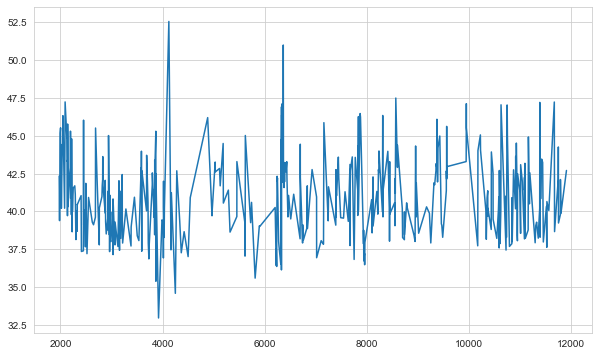

In [21]:
plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x=donation_idx, y=avg_temp_per_patient)

Let's take first 28 scans per id to and see how the aveerage temperature differs per id

In [22]:
avg_temp_per_patient_28 = []

for i in donation_idx:

    df = patients_df[i][0:28]

    temp = df["temperature"]
    avg_temp_per_patient_28.append(np.mean(temp))


# plt.subplots(figsize=(10, 6))
# sns.set_style("whitegrid")
# sns.lineplot(x=donation_idx, y=avg_temp_per_patient_28)

In [23]:
donation_idx[:10]

array([2250, 6316, 7148, 3068, 4541, 2968, 2133, 8790, 6395, 6370],
      dtype=int64)

In [24]:
print( np.mean(patients_df[6824][0:28]["temperature"]) )
print( np.mean(patients_df[6824]["temperature"] ))

37.957499999999996
38.89016666666667


<AxesSubplot:>

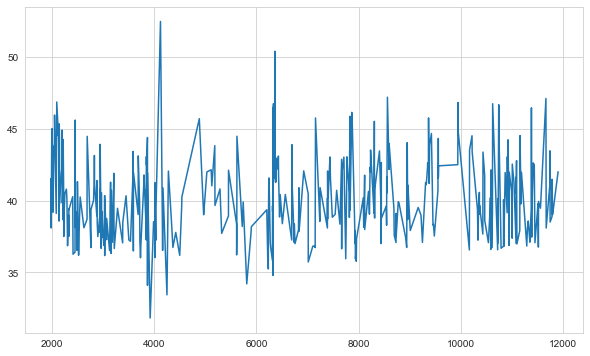

In [26]:
plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x=donation_idx, y=avg_temp_per_patient_28)

<AxesSubplot:>

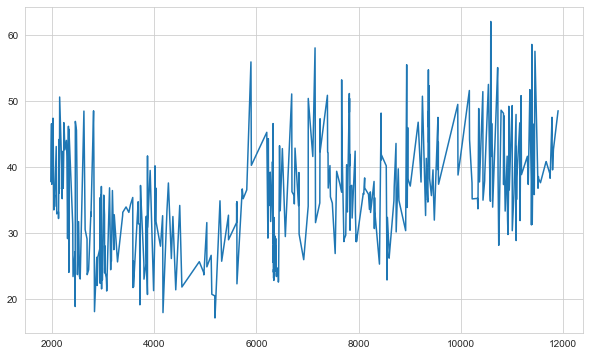

In [27]:
plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x=donation_idx, y=avg_humid_per_patient)

Temperature and Humidity are inversely proportional

an increase in temperature would lead to an increase in humidity

Temperature and Humidity are Noisy asf

<AxesSubplot:>

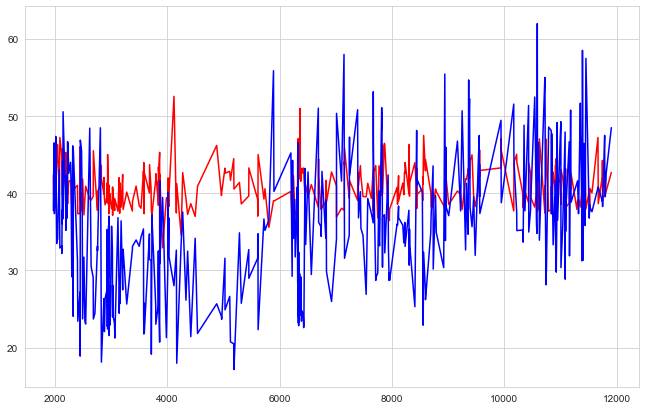

In [28]:
plt.subplots(figsize=(11, 7))
sns.set_style("whitegrid")

sns.lineplot(x=pd.Series(donation_idx), y=pd.Series(avg_temp_per_patient) , color="red")
sns.lineplot(x=pd.Series(donation_idx), y=pd.Series(avg_humid_per_patient), color="blue")

clean users with high avg temperatures
drop users with high temps

look at spectrum of high temps

In [29]:
# Renaming columns: (X) Wavelength to absorbance

hgb_spectra = pd.read_csv("hemoglobin_Spectra.csv", header=1).rename(columns={"(X) Wavelength":"X" , "(Y)Absorbance Coefficient  (cm-1)":"absorbance"})
ldl_spectra = pd.read_csv("Cholesterol_Spectra.csv", header=1).rename(columns={"(X) Wavelength":"X" , "(Y)Absorbance Coefficient  (cm-1)":"absorbance"})
hdl_spectra = pd.read_csv("Glucose.csv", header=1).rename(columns={"(X) Wavelength":"X" , "(Y)Absorbance Coefficient  (cm-1)":"absorbance"})

In [30]:
hgb_spectra.head(2)

,X,absorbance,Unnamed: 2,(X) Wavelength.1,(Y)Absorbance Coefficient (cm-1).1
0,900.000000,4.014902,NaN,900.000000,6.432784
1,904.733704,4.138519,NaN,904.733704,6.432784


In [31]:
ldl_spectra.head(2)

,X,absorbance
0,900.000000,0.176312
1,904.733704,0.176036


In [32]:
hdl_spectra.head(2)

,X,absorbance
0,900.000000,0.0
1,904.733704,0.0


In [33]:
## plotting spectrum data_with absorbance levels


def ab_spec(id_):
    plt.subplots(figsize=(11, 7))
    sns.set_style("whitegrid")
    id_df = patients_df[id_]

    id_df = id_df.drop(["temperature", "humidity", "hdl", "hgb", "ldl", "donation_id", "id", "std"], axis=1)

    for i in range(60):
        id_scan = id_df.iloc[i]
        id_df_scan = pd.DataFrame({"X":hgb_spectra["X"] , "absorbance":id_scan[11:-11].values })

        id_df_scan["absorbance"] = id_df_scan["absorbance"].astype("float32")

        sns.lineplot(x=pd.Series( id_df_scan["X"] ) , y=pd.Series( id_df_scan["absorbance"] ))

    
    # sns.lineplot(x=pd.Series(hgb_spectra["X"]), y=pd.Series(hgb_spectra["absorbance"]), color='red')
    # sns.lineplot(x=pd.Series(ldl_spectra["X"]), y=pd.Series(ldl_spectra["absorbance"]), color='g')
    # sns.lineplot(x=pd.Series(hdl_spectra["X"]), y=pd.Series(hdl_spectra["absorbance"]), color='y')
    
    # del id_df


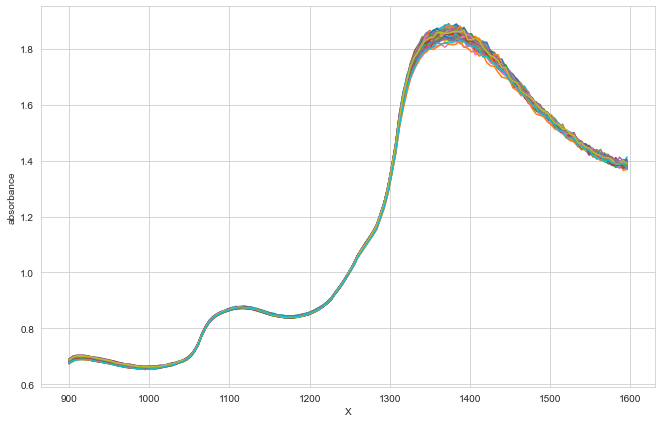

In [34]:
ab_spec(7152)

Let's pick patients
1. with low low low
2. with low low ok
3. with low low high
4. with low ok low
5. with low ok ok
6. with low ok high
with 



In [35]:
train.head(3)

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl,hgb,ldl,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250


In [36]:
# IDs with "low" as hdl

train[train["hdl"] == "low"]["donation_id"].unique()

array([ 2250,  6316,  2133,  8790,  3987,  2830,  2132,  2960,  5741,
        4277,  3381,  3061,  7668,  7819,  6313,  3731,  2182,  7153,
        7150,  3535,  6359,  2828,  2550,  1982,  3738,  2875,  2623,
        2220,  1989,  5189,  2896,  2876,  2449,  6362,  2933,  5127,
        4013,  3011,  6327,  2194,  3593,  9326,  3868,  5187,  3920,
        2214,  2048,  2455,  2140,  1975,  6242, 11390, 11156, 11100,
       11093, 11086, 11009, 10948, 10790, 10750, 10744, 10731, 10724,
       10606, 10592, 10591, 10588, 10542, 10433, 10169,  9566,  9562,
        9561,  9560,  9554,  9426,  9372,  9371,  9370,  8963,  8734,
        8733,  8549,  8542,  8446,  8445,  8441,  8233,  8225,  8119,
        8101,  7960,  7938,  7935,  7933,  7874,  7829,  7828,  7825,
        7781,  7771,  7571,  7449,  7406,  7241,  6824,  6756,  6742,
        6691,  6508,  6466,  6424,  6203,  5901,  5893,  5287,  4971,
        4035,  3799,  3503,  2936,  2934,  2812,  2477,  2229,  2218,
        2198,  2148,

In [37]:
len(train[train["hdl"] == "low"]["donation_id"].unique())

132

In [38]:
def con_tar_onehot(targets):

    targets = pd.get_dummies(targets)

    return targets

train_targets = con_tar_onehot(train[['hdl', 'hgb', 'ldl']])

train_targets.head(3)

,hdl_high,hdl_low,hdl_ok,hgb_high,hgb_low,hgb_ok,ldl_high,ldl_low,ldl_ok
0,0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0,0
2,0,1,0,0,0,1,1,0,0


In [39]:
def undummify(df, prefix_sep="_"):

    cols2collapse = { item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns }

    series_list = []

    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (df.filter(like=col).idxmax(axis=1).apply(lambda x: x.split(prefix_sep, maxsplit=1)[1]).rename(col) )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
        undummified_df = pd.concat(series_list, axis=1)
    
    return undummified_df

train_targets = undummify(train_targets)

# Absorbance Spectrum for patients with low hdl levels.

In [68]:
# for i in train[train["hdl"] == "low"]["donation_id"].unique():
#     ab_spec(i)

In [69]:
# for i in [2250, 8790, 2960, 3381, 7668, 2550, 6362, 3593, 10790]:

#     ab_spec(i)

These values with large variations in absorbance, let's check their temperature.

In [40]:
train[train["hdl"] == "high"]["donation_id"].unique()

array([ 3579,  6366,  6233,  6379,  6696,  5029,  3156,  2647,  2984,
        2536,  6375,  5030,  3448, 10625,  5454,  5453,  5619,  6326,
        3869,  2884,  7669,  6354,  6318,  3834,  3585,  6339,  6343,
        6336,  3849,  2519,  6387,  5811, 10623,  5616,  2715,  5617,
        2937,  3592,  3281,  3029,  2496,  4019,  2018, 11906, 11815,
       11798, 11750, 11747, 11668, 11561, 11523, 11520, 11513, 11420,
       11385, 11384, 11382, 11322, 11189, 11181, 11042, 10995, 10925,
       10844, 10746, 10621, 10581, 10574, 10470, 10469, 10368, 10367,
       10365, 10352, 10337, 10221,  9382,  9357,  9351,  9312,  9250,
        9012,  8736,  8698,  8598,  8597,  8314,  8311,  8309,  8303,
        8213,  8194,  8092,  7955,  7952,  7936,  7867,  7826,  7767,
        7717,  7394,  6415,  5723,  3685,  3591], dtype=int64)

Let's see the difference in absorbance spectrum when hdl is low vs when hdl is high

# Absorbance Spectrum of patients with high hdl levels

In [70]:
# for i in train[train["hdl"] == "high"]["donation_id"].unique():
#     ab_spec(i)

# Perform PCA on absorbance features

In [41]:
test.columns

Index(['Reading_ID', 'donation_id', 'absorbance0', 'absorbance1',
       'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5',
       'absorbance6', 'absorbance7',
       ...
       'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167',
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity'],
      dtype='object', length=176)

In [116]:
test_reading_id = test.Reading_ID
test_donation_id = test.donation_id
test_id = test.id
test_std = test["std"]
test_temperature = test.temperature
test_humidity = test.humidity

test_absorbance = test.drop( ["Reading_ID", "donation_id", "id", "std", "temperature", "humidity"], axis=1 )

test_absorbance.head(3)

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169
0,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,0.565622,0.575762,...,1.234971,1.223950,1.235415,1.234605,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182
1,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,0.566446,0.578208,...,1.232710,1.238981,1.237033,1.237152,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939
2,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,0.566793,0.580574,...,1.239622,1.228925,1.240135,1.238346,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631


In [43]:
[i for i in test.columns if test[i].dtype == "object"]

['Reading_ID', 'donation_id']

In [44]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)

In [45]:
train_absorbance = train.iloc[:, 0:170]

train_absorbance.head(4)

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.329464,1.314664,1.313583,1.313329,1.312243,1.310330,1.353629,1.336609,1.319344,1.278294
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.316437,1.316180,1.316063,1.320698,1.321068,1.286939,1.301804,1.314457,1.282723,1.267465
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.327512,1.339627,1.322394,1.328299,1.311948,1.310330,1.311108,1.283048,1.287730,1.266464
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.331542,1.347718,1.321111,1.320285,1.303363,1.306762,1.297632,1.314811,1.314408,1.342224


In [46]:
train.head(1)

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl,hgb,ldl,donation_id
0,0.520883,0.5282,0.529795,0.537382,0.540265,0.54626,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250


In [47]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)

In [48]:
from sklearn.decomposition import PCA

# hdl, hgb, ldl

In [117]:
pca = PCA(n_components=28)

pca_model = pca.fit(train_absorbance)

train_absorbance_pca = pca_model.transform(train_absorbance)
test_absorbance_pca = pca_model.transform(test_absorbance)

In [118]:
train_absorbance_pca = pd.DataFrame( train_absorbance_pca)
test_absorbance_pca = pd.DataFrame( test_absorbance_pca )

# train

train_absorbance_pca["donation"] = train["donation_id"]
train_absorbance_pca["hdl"] = train["hdl"]
train_absorbance_pca["hgb"] = train["hgb"]
train_absorbance_pca["ldl"] = train["ldl"]
train_absorbance_pca["humidity"] = train["humidity"]
train_absorbance_pca["temperature"] = train["temperature"]
train_absorbance_pca["std"] = train["std"]
train_absorbance_pca["id"] = train["id"]

# Test
# ["Reading_ID", "donation_id", "id", "std", "temperature", "humidity"]
test_absorbance_pca["donation_id"] = test_donation_id
test_absorbance_pca["Reading_ID"] = test_reading_id
test_absorbance_pca["id"] = test_id
# test_absorbance_pca["std"] = test_std
test_absorbance_pca["temperature"] = test_temperature
test_absorbance_pca["humidity"] = test_humidity

train_absorbance_pca.head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,donation,hdl,hgb,ldl,humidity,temperature,std,id
0,-0.370071,-0.193557,-0.094464,-0.024239,-0.123790,-0.020034,-0.036396,-0.003451,-0.021514,-0.008444,...,0.002140,0.009212,2250,low,ok,high,44.17,39.27,0.0026,0
1,-0.470032,-0.078970,0.003869,-0.033998,-0.111482,0.004496,-0.016787,-0.022712,-0.011383,-0.012992,...,-0.001716,-0.008189,2250,low,ok,high,44.09,39.39,0.0026,1
2,-0.493376,-0.055672,0.007511,-0.039038,-0.122868,-0.004894,-0.015604,-0.033149,0.018439,-0.008560,...,0.004956,0.005231,2250,low,ok,high,44.00,39.50,0.0026,2


In [119]:
test_absorbance_pca.head(3)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,donation_id,Reading_ID,id,temperature,humidity
0,0.438380,-0.470352,0.062100,0.067401,-0.060732,0.076877,0.034481,-0.024350,-0.004634,-0.003421,...,0.007236,0.003083,0.001386,0.002203,0.000214,ID_2982,ID_KWUAQLRM,0,37.09,27.22
1,0.425298,-0.466345,0.070342,0.067240,-0.060227,0.083276,0.030705,-0.013153,0.005892,-0.005179,...,0.004086,-0.000143,-0.000537,0.002056,0.001116,ID_2982,ID_FN8SIVJJ,1,37.20,27.17
2,0.426481,-0.471955,0.089097,0.043784,-0.049596,0.076404,-0.027680,-0.020647,0.019435,-0.001208,...,0.004967,0.000831,0.000076,-0.002740,0.001329,ID_2982,ID_CI4TQCHI,2,37.30,27.07


In [120]:
assert train_absorbance_pca.shape[0] == train.shape[0], "train_absorbance_pca.shape != train.shape"

In [121]:
pca_patients = train_absorbance_pca.groupby(["donation"])
pca_test_patients = test_absorbance_pca.groupby(["donation_id"])

In [122]:
pca_patients_df = {}
pca_patients_test_df = {}


for i in donation_idx:
    # this is for train_data
    df = pca_patients.get_group(i)
    pca_patients_df[i] = df

for i in test_donation_id.values:
    # this is for test_data
    df = pca_test_patients.get_group(i)
    pca_patients_test_df[i] = df

In [123]:
donation_idx[0:10]

array([2250, 6316, 7148, 3068, 4541, 2968, 2133, 8790, 6395, 6370],
      dtype=int64)

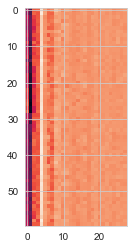

In [124]:
plt.imshow( pca_patients_df[3068].iloc[0:60, 0:28] )

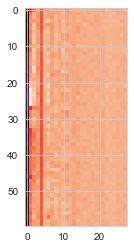

In [125]:
plt.imshow( pca_patients_df[2250].iloc[0:60, 0:28] )

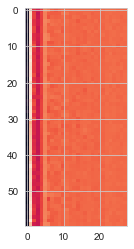

In [126]:
plt.imshow( pca_patients_df[6370].iloc[0:60, 0:28] )

In [127]:
# hdl, hgb, ldl
print( pca_patients_df[3068][["hdl", "hgb", "ldl"]].value_counts() )
print( pca_patients_df[2250][["hdl", "hgb", "ldl"]].value_counts() )
print( pca_patients_df[6370][["hdl", "hgb", "ldl"]].value_counts() )

hdl  hgb  ldl
ok   ok   low    60
dtype: int64
hdl  hgb  ldl 
low  ok   high    60
dtype: int64
hdl  hgb  ldl 
ok   ok   high    60
dtype: int64


# Let's prepare data for training

In [60]:
# def trim_scans(data, n_of_scans):
    
#     new_data = data
#     count = 0
#     for i in donation_idx:
#         print(count)
#         df = patients_df[i].iloc[n_of_scans:]
#         df_ids = df["id"].values
        
#         new_data = new_data.drop(df_ids, axis=0)
#         count = count + 1
    
#     return new_data

# cc = trim_scans(train_absorbance_pca, 28)

In [128]:
test_absorbance_pca

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,donation_id,Reading_ID,id,temperature,humidity
0,0.438380,-0.470352,0.062100,0.067401,-0.060732,0.076877,0.034481,-0.024350,-0.004634,-0.003421,...,0.007236,0.003083,0.001386,0.002203,0.000214,ID_2982,ID_KWUAQLRM,0,37.09,27.22
1,0.425298,-0.466345,0.070342,0.067240,-0.060227,0.083276,0.030705,-0.013153,0.005892,-0.005179,...,0.004086,-0.000143,-0.000537,0.002056,0.001116,ID_2982,ID_FN8SIVJJ,1,37.20,27.17
2,0.426481,-0.471955,0.089097,0.043784,-0.049596,0.076404,-0.027680,-0.020647,0.019435,-0.001208,...,0.004967,0.000831,0.000076,-0.002740,0.001329,ID_2982,ID_CI4TQCHI,2,37.30,27.07
3,0.407344,-0.476678,0.115955,0.058637,-0.038260,0.089653,0.003397,-0.030601,-0.012392,-0.026344,...,0.008450,-0.001072,0.006572,-0.000232,0.000114,ID_2982,ID_URJMKNU7,3,37.38,26.98
4,0.438438,-0.476144,0.108155,0.038912,-0.046318,0.077264,0.022970,-0.040968,-0.015078,-0.012664,...,0.015158,-0.000905,-0.002910,-0.004956,0.002206,ID_2982,ID_HBJH67IS,4,37.48,26.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,-0.457690,0.275207,-0.293158,-0.047533,0.034535,0.023284,-0.072644,0.011190,0.038380,-0.022038,...,0.000973,-0.007717,0.004649,0.003168,-0.004955,ID_3637,ID_HDGHLAEP,3655,40.63,36.33
3656,-0.509404,0.319264,-0.327238,-0.035003,0.025093,0.030390,0.024376,-0.059221,-0.008255,-0.029554,...,-0.011058,-0.017486,0.003264,-0.008047,-0.000168,ID_3637,ID_FZOHFGJT,3656,40.66,36.33
3657,-0.527211,0.329697,-0.336794,-0.034008,0.024255,0.037063,-0.017757,-0.034813,0.015892,-0.021914,...,-0.012835,-0.011643,0.014813,-0.007754,0.008589,ID_3637,ID_7491X84N,3657,40.70,36.23
3658,-0.410348,0.177054,-0.320529,-0.029342,0.047873,0.043002,-0.035292,-0.021227,0.033953,-0.019151,...,-0.015989,-0.015937,0.004507,-0.006065,-0.000617,ID_3637,ID_TAG0EZ2L,3658,40.72,36.23


In [129]:
train_absorbance_pca

,0,1,2,3,4,5,6,7,8,9,...,26,27,donation,hdl,hgb,ldl,humidity,temperature,std,id
0,-0.370071,-0.193557,-0.094464,-0.024239,-0.123790,-0.020034,-0.036396,-0.003451,-0.021514,-0.008444,...,0.002140,0.009212,2250,low,ok,high,44.17,39.27,0.0026,0
1,-0.470032,-0.078970,0.003869,-0.033998,-0.111482,0.004496,-0.016787,-0.022712,-0.011383,-0.012992,...,-0.001716,-0.008189,2250,low,ok,high,44.09,39.39,0.0026,1
2,-0.493376,-0.055672,0.007511,-0.039038,-0.122868,-0.004894,-0.015604,-0.033149,0.018439,-0.008560,...,0.004956,0.005231,2250,low,ok,high,44.00,39.50,0.0026,2
3,-0.523099,-0.031235,-0.034057,-0.020170,-0.126563,0.010727,0.042002,-0.004951,0.006900,-0.023394,...,-0.010654,-0.002058,2250,low,ok,high,43.89,39.60,0.0026,3
4,-0.467472,-0.063375,0.049445,-0.054600,-0.109934,-0.011720,-0.047540,-0.027606,0.002163,-0.015108,...,0.010021,0.001377,2250,low,ok,high,43.83,39.70,0.0026,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29155,0.296843,-0.401118,-0.068091,-0.032397,0.014979,0.014182,-0.003325,0.021456,-0.007627,-0.019571,...,0.001108,0.006978,1994,low,ok,high,37.06,45.56,0.0098,36075
29156,0.284057,-0.403811,-0.098303,-0.004153,0.005952,0.022512,0.025634,0.019743,0.001261,-0.002895,...,0.003833,0.007274,1994,low,ok,high,37.06,45.58,0.0098,36076
29157,0.300650,-0.423882,-0.056277,-0.023412,0.019763,0.018275,-0.008102,-0.005513,-0.013810,-0.020594,...,0.001833,0.000477,1994,low,ok,high,37.01,45.58,0.0098,36077
29158,0.295422,-0.415490,-0.062463,-0.035614,0.020360,0.019429,0.012610,-0.008492,-0.006841,-0.000671,...,-0.002862,0.001916,1994,low,ok,high,36.97,45.60,0.0098,36078


- when we assign folds to every id
- we create a list to hold every id in the training folds
- loop through the list, get the data for every id
- convert to array and append to image_list

In [130]:
target = train_absorbance_pca[["hdl", "hgb", "ldl"]]

In [131]:
train_absorbance_pca["fold"] = -1

In [132]:
from sklearn.model_selection import GroupKFold

group_k_fold = GroupKFold(n_splits=5)
# group_k_fold.get_n_splits(train, target, groups)

groups = train.donation_id

for fold, (train_idx, val_idx) in enumerate(group_k_fold.split(train_absorbance_pca, target, groups=groups)):
    print(f"FOLD:{fold} ------- TRAIN_IDX:{train_idx} ---------- VAL_IDX:{val_idx} ")
    print("")
    print("")
    train_absorbance_pca.loc[val_idx, "fold"] = fold
    target.loc[val_idx, "fold"] = fold

FOLD:0 ------- TRAIN_IDX:[    0     1     2 ... 29157 29158 29159] ---------- VAL_IDX:[  420   421   422 ... 28977 28978 28979] 


FOLD:1 ------- TRAIN_IDX:[    0     1     2 ... 29157 29158 29159] ---------- VAL_IDX:[  240   241   242 ... 28797 28798 28799] 


FOLD:2 ------- TRAIN_IDX:[    0     1     2 ... 29097 29098 29099] ---------- VAL_IDX:[  480   481   482 ... 29157 29158 29159] 


FOLD:3 ------- TRAIN_IDX:[  180   181   182 ... 29157 29158 29159] ---------- VAL_IDX:[    0     1     2 ... 29097 29098 29099] 


FOLD:4 ------- TRAIN_IDX:[    0     1     2 ... 29157 29158 29159] ---------- VAL_IDX:[  180   181   182 ... 29037 29038 29039] 




C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [133]:
target_29160_rows = con_tar_onehot( train_absorbance_pca[["hdl", "hgb", "ldl"]] )

target_29160_rows["donation_id"] = train.donation_id

In [153]:
def get_training_data_image(data):
    '''
    This function would take care of returning a dataframe without the [donation, hdl, hgb etc] columns
    the dataframe returned would have the shape of [batch_size, height, width]
    '''
    images = []
    target = []
    
    # get list of donatiion ids
    data_ids = list( data["donation"].unique() )

    for i in data_ids:
        df = pca_patients_df[i]

        df = df.drop(["donation", "hdl", "hgb", "ldl", "humidity", "temperature", "std", "id"], axis=1)
        df = np.array(df)
        images.append(df)

        t = target_29160_rows[target_29160_rows["donation_id"] == i].iloc[0].drop("donation_id")

        target.append(t)
    
    images = np.array(images)
    images = np.reshape(images, [images.shape[0] , images.shape[1], images.shape[2], 1 ])
    return ( images, np.array(target) )


def get_test_data_image(data):
    '''
    This function transforms the test data into images and gets rid of unnecessary columns.
    '''
    images = []
    
    # get list of donatiion ids
    data_ids = list( data["donation_id"].unique() )
    print(len(data_ids))

    for i in data_ids:
        df = pca_patients_test_df[i]

        df = df.drop(["donation_id", "Reading_ID", "id", "temperature", "humidity"], axis=1)
        df = np.array(df)
        images.append(df)
    
    images = np.array(images)
    images = np.reshape(images, [images.shape[0] , images.shape[1], images.shape[2], 1 ])
    return images



class MultioutputAccuracy(keras.metrics.Metric):
    def __init__(self, **kwargs):
        super(MultioutputAccuracy, self).__init__(**kwargs)
        self.accuracy = tf.Variable(0, dtype=tf.float64)

    def update_state(self, y_true, y_pred, sample_weight=None):
        new_y_pred = tf.round(y_pred)

        acm = new_y_pred == tf.cast(y_true, tf.float32)
        print(acm)
        acm = tf.cast(acm, tf.int64)


        # print(f"y_true.shape: {y_true.shape}")
        # print(f"y_pred.shape: {y_pred.shape}")

        acm = tf.reduce_sum(acm, axis=1) / 3

        acm = tf.reduce_mean(acm)
        print(acm)
        self.accuracy.assign_add(acm)
    
    def result(self):
        return self.accuracy

In [283]:
model = keras.models.Sequential([

    keras.layers.Input(shape=[60, 28, 1]),
    keras.layers.Conv2D(64, 3, padding="valid", activation="relu"),
    keras.layers.Conv2D(124, 3, padding="valid", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(9, activation="sigmoid"),

])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics="accuracy")

In [284]:
# Validating get_training_data_image function.    
    
vv, bx = get_training_data_image( train_absorbance_pca[train_absorbance_pca["fold"] == 1 ])

print(vv.shape)
print(bx.shape)

# train_absorbance_pca.columns

(97, 60, 28, 1)
(97, 9)


# Continue fixing the training algorithm

In [285]:
val_accuracy_score = MultioutputAccuracy()
train_accuracy_score = MultioutputAccuracy()

In [286]:


val_accuracy = []
train_accuracy = []

for fold in range(5):
    print(f"VALIDATING ON FOLD:{fold} ----- TRAINING ON OTHER FOLDS")
    print(" ")

    train_X = train_absorbance_pca[train_absorbance_pca["fold"] != fold]

    (train_X, train_Y) = get_training_data_image(train_X)
    train_X_ , train_Y_ = train_X, train_Y


    val_X = train_absorbance_pca[ train_absorbance_pca["fold"] == fold ]
    
    (val_X_, val_Y_) = get_training_data_image(val_X)
    val_X, val_Y = val_X_, val_Y_

    # ----

    model.fit(train_X_, train_Y_, validation_data=(val_X_, val_Y_) , epochs=10, shuffle=True)
    

    pred_y = model.predict(val_X)
    pred_y_t = model.predict(train_X) 

    acc = val_accuracy_score(val_Y, pred_y)
    acc_t = train_accuracy_score(train_Y, pred_y_t)
    
    val_accuracy.append(acc)
    train_accuracy.append(acc_t)

    val_accuracy_score.reset_states()
    train_accuracy_score.reset_states()

    print("")
    print("")
    print("")

VALIDATING ON FOLD:0 ----- TRAINING ON OTHER FOLDS
 
Epoch 1/10
13/13 [==============================] - 5s 358ms/step - loss: 6.7463 - accuracy: 0.0954 - val_loss: 5.9860 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 4s 331ms/step - loss: 5.9028 - accuracy: 0.0773 - val_loss: 5.8887 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 4s 326ms/step - loss: 5.8264 - accuracy: 0.0180 - val_loss: 5.9191 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 4s 323ms/step - loss: 5.8746 - accuracy: 0.0077 - val_loss: 5.8968 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 5s 357ms/step - loss: 5.7675 - accuracy: 0.0026 - val_loss: 5.8855 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 4s 344ms/step - loss: 5.7732 - accuracy: 0.0000e+00 - val_loss: 5.8922 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 4s 333ms/step -

with categorical cross_entropy we have avg accuracy of 2.25

with binary cross_entropy we have avg accuracy of 

In [287]:
print(np.mean(train_accuracy) )

print( np.mean(val_accuracy) )


2.212452848523396
2.212013465179886


# Let's run on test data

In [288]:
test_absorbance_pca.head(3)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,donation_id,Reading_ID,id,temperature,humidity
0,0.438380,-0.470352,0.062100,0.067401,-0.060732,0.076877,0.034481,-0.024350,-0.004634,-0.003421,...,0.007236,0.003083,0.001386,0.002203,0.000214,ID_2982,ID_KWUAQLRM,0,37.09,27.22
1,0.425298,-0.466345,0.070342,0.067240,-0.060227,0.083276,0.030705,-0.013153,0.005892,-0.005179,...,0.004086,-0.000143,-0.000537,0.002056,0.001116,ID_2982,ID_FN8SIVJJ,1,37.20,27.17
2,0.426481,-0.471955,0.089097,0.043784,-0.049596,0.076404,-0.027680,-0.020647,0.019435,-0.001208,...,0.004967,0.000831,0.000076,-0.002740,0.001329,ID_2982,ID_CI4TQCHI,2,37.30,27.07


In [289]:
test_absorbance_pca.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
                  24,            25,            26,            27,
       'donation_id',  'Reading_ID',          'id', 'temperature',
          'humidity'],
      dtype='object')

In [290]:
idx = test_absorbance_pca.Reading_ID.values
id = test_absorbance_pca.donation_id.values

In [291]:
test_absorbance_pca.shape

(3660, 33)

In [292]:
test_images = get_test_data_image(test_absorbance_pca)

61


In [293]:
test_predictions = model.predict(test_images)

In [294]:
ff = (model.predict(test_images) > 0.5).astype("int32")

In [295]:
ff

array([[0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1,

In [296]:
test_predictions.shape

(61, 9)

In [297]:
# hdl_high	hdl_low	hdl_ok	hgb_high	hgb_low	hgb_ok	ldl_high	ldl_low	ldl_ok
 
test_predictions = pd.DataFrame(ff, columns=["hdl_high", "hdl_low", "hdl_ok", "hgb_high", "hgb_low", "hgb_ok", "ldl_high", "ldl_low", "ldl_ok"])

test_predictions

,hdl_high,hdl_low,hdl_ok,hgb_high,hgb_low,hgb_ok,ldl_high,ldl_low,ldl_ok
0,0,0,1,0,0,1,1,0,1
1,0,0,1,0,0,1,1,0,1
2,0,0,1,0,0,1,1,0,1
3,0,0,1,0,0,1,1,0,1
4,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
56,0,0,1,0,0,1,1,0,1
57,0,0,1,0,0,1,1,0,1
58,0,0,1,0,0,1,1,0,1
59,0,0,1,0,0,1,1,0,1


In [298]:
test_predictions = undummify(test_predictions)

test_predictions

,hdl,hgb,ldl
0,ok,ok,high
1,ok,ok,high
2,ok,ok,high
3,ok,ok,high
4,ok,ok,high
...,...,...,...
56,ok,ok,high
57,ok,ok,high
58,ok,ok,high
59,ok,ok,high


In [299]:
def modify_test_predictions(test_prediction):
    new_df = pd.DataFrame(columns=["hdl", "hgb", "ldl"])
    for i in range(61):

        for j in range(60):
            new_df = new_df.append( pd.DataFrame(test_prediction.iloc[i] ).T )
    return new_df


test_predictions = modify_test_predictions(test_predictions)

In [300]:
test_predictions

,hdl,hgb,ldl
0,ok,ok,high
0,ok,ok,high
0,ok,ok,high
0,ok,ok,high
0,ok,ok,high
...,...,...,...
60,ok,ok,high
60,ok,ok,high
60,ok,ok,high
60,ok,ok,high


In [301]:
test_predictions["Reading_ID"] = id

test_predictions = test_predictions.rename(columns={"hdl":"hdl_cholesterol_human" , "hgb":"hemoglobin(hgb)_human", "ldl":"cholesterol_ldl_human"})

test_predictions = test_predictions.reset_index(drop=True)

test_predictions

,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,Reading_ID
0,ok,ok,high,ID_2982
1,ok,ok,high,ID_2982
2,ok,ok,high,ID_2982
3,ok,ok,high,ID_2982
4,ok,ok,high,ID_2982
...,...,...,...,...
3655,ok,ok,high,ID_3637
3656,ok,ok,high,ID_3637
3657,ok,ok,high,ID_3637
3658,ok,ok,high,ID_3637


In [302]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

hdl_rows = pd.DataFrame(test_predictions.apply(transform_c_hdl, axis=1))

def transform_hemo(row):
    return str(row["Reading_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

hemo_rows = pd.DataFrame(test_predictions.apply(transform_hemo, axis=1))

def transform_c_ldl(row):
    return str(row["Reading_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

ldl_rows = pd.DataFrame(test_predictions.apply(transform_c_ldl, axis=1))

test_predictions = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [303]:
test_predictions["target"] = test_predictions[0].apply(lambda x: x.split("-")[1])
test_predictions[0] = test_predictions[0].apply(lambda x: x.split("-")[0])

In [304]:
test_predictions = test_predictions.rename(columns={0:"Reading_ID"})

In [305]:
test_predictions.to_csv("submissions//01.csv", index=False)

In [306]:
test_predictions[test_predictions["Reading_ID"] == "ID_1961_cholesterol_ldl_human"]

,Reading_ID,target
10440,ID_1961_cholesterol_ldl_human,high
10441,ID_1961_cholesterol_ldl_human,high
10442,ID_1961_cholesterol_ldl_human,high
10443,ID_1961_cholesterol_ldl_human,high
10444,ID_1961_cholesterol_ldl_human,high
10445,ID_1961_cholesterol_ldl_human,high
10446,ID_1961_cholesterol_ldl_human,high
10447,ID_1961_cholesterol_ldl_human,high
10448,ID_1961_cholesterol_ldl_human,high
10449,ID_1961_cholesterol_ldl_human,high
